In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


In [2]:
stock=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA Cleaned Data 2015-2024.csv")
test=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA training data.csv")
#final=pd.read_csv("filename") once the test data is prepared

In [3]:
mean_open=test["Open"].mean()
test['Open'].fillna({'Open':mean_open},inplace=True)
mean_low=test['Low'].mean()
test['Low'].fillna({'Low':mean_low},inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_2644\742366525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna({'Open':mean_open},inplace=True)
C:\Users\parth\AppData\Local\Temp\ipykernel_2644\742366525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
meanopen=stock['Open'].mean()
meanhigh=stock['High'].mean()
meanlow=stock['Low'].mean()
meanclose=stock['Close'].mean()

medianopen=stock['Open'].median()
medianhigh=stock['High'].median()
medianlow=stock['Low'].median()
medianclose=stock['Close'].median()

modeopen=stock['Open'].mode().iloc[0]
modehigh=stock['High'].mode().iloc[0]
modelow=stock['Low'].mode().iloc[0]
modeclose=stock['Close'].mode().iloc[0]

print("Mean:",meanopen)
print("Median:",medianopen)
print("Mode:",modeopen)

Mean: 112.661155088853
Median: 25.365000000000002
Mode: 14.87


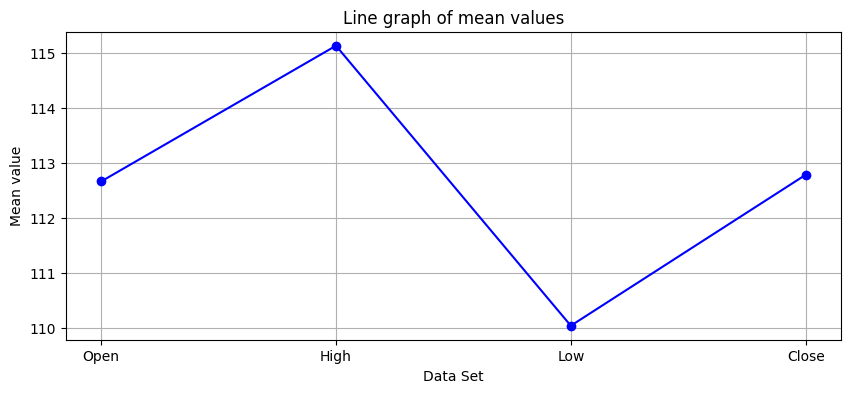

In [7]:
means=[meanopen,meanhigh,meanlow,meanclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(means)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(means)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mean value')
plt.title('Line graph of mean values')
plt.grid(True)
plt.show()

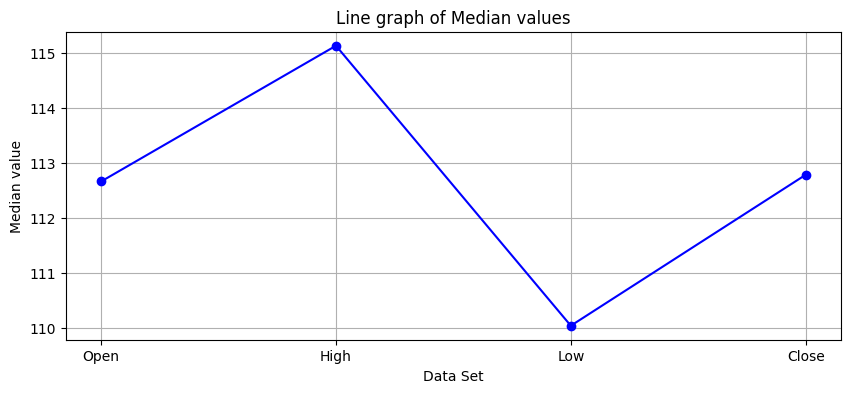

In [8]:
medians=[medianopen,medianhigh,medianlow,medianclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(medians)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(medians)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Median value')
plt.title('Line graph of Median values')
plt.grid(True)
plt.show()

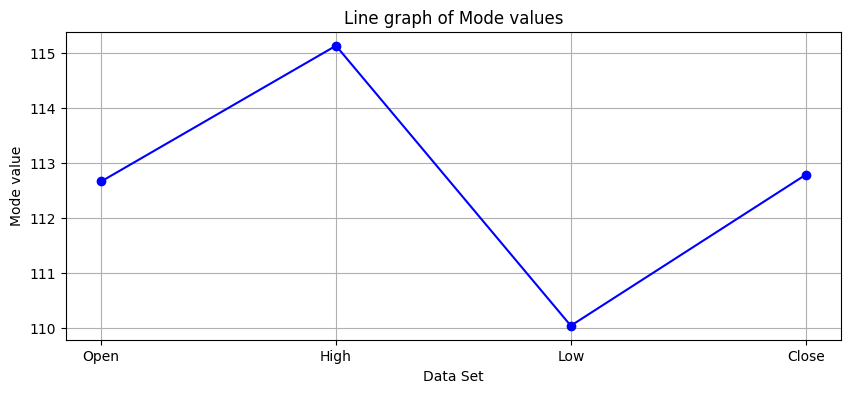

In [9]:
modes=[modeopen,modehigh,modelow,modeclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(modes)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(modes)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mode value')
plt.title('Line graph of Mode values')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

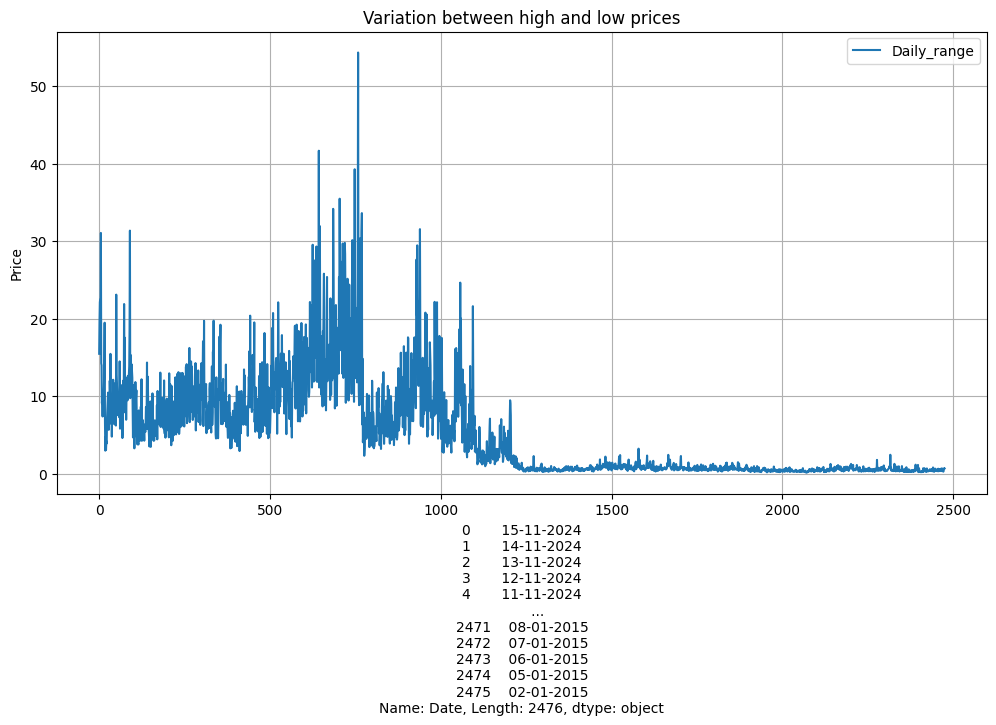

In [10]:
stock['Daily_range']=stock['High']-stock['Low']
test['Daily_range']=test['High']-stock['Low']
plot_cols=['Daily_range']

plt.figure(figsize=(12,6))
stock[plot_cols].plot(kind='line',figsize=(12,6))
plt.xlabel(stock['Date'])
plt.ylabel('Price')

if len(plot_cols)==2:
    plt.lines[0].set_label('High')
    plt.lines[1].set_label('Low')

plt.title("Variation between high and low prices")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
stock.head()

,Unnamed: 0,Date,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range
0,0,15-11-2024,320.72,310.57,324.68,309.22,114.44,0.0307,315.60,15.46
1,1,14-11-2024,311.18,327.69,329.98,310.37,120.73,-0.0577,310.57,19.61
2,2,13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10
3,3,12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53
4,4,11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64


Change the date to some other format since we can't apply the corr() function on date with all the others

In [12]:
stock.set_index(['Date'],inplace=True)
test.set_index(['Date'],inplace=True)

Volatility (usually denoted by "σ") is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

In [13]:
stock['Volatility']=(stock['High']-stock['Low'])/stock['Open']
test['Volatility']=(test['High']-test['Low'])/test['Open']
stock

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Date,,,,,,,,,,
15-11-2024,0,320.72,310.57,324.68,309.22,114.44,0.0307,315.60,15.46,0.049779
14-11-2024,1,311.18,327.69,329.98,310.37,120.73,-0.0577,310.57,19.61,0.059843
13-11-2024,2,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.065803
12-11-2024,3,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065735
11-11-2024,4,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.065377
...,...,...,...,...,...,...,...,...,...,...
08-01-2015,2481,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25,0.017618
07-01-2015,2482,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33,0.023207
06-01-2015,2483,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67,0.047857


In [ ]:
stock['Volatility'].loc[-1]

The below code is shifing the volatility since 

In [14]:
stock['Volatility']=stock['Volatility'].shift(1)
test['Volatility']=test['Volatility'].shift(1)
stock

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Date,,,,,,,,,,
15-11-2024,0,320.72,310.57,324.68,309.22,114.44,0.0307,315.60,15.46,NaN
14-11-2024,1,311.18,327.69,329.98,310.37,120.73,-0.0577,310.57,19.61,0.049779
13-11-2024,2,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.059843
12-11-2024,3,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065803
11-11-2024,4,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.065735
...,...,...,...,...,...,...,...,...,...,...
08-01-2015,2481,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25,0.024408
07-01-2015,2482,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33,0.017618
06-01-2015,2483,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67,0.023207


In [15]:
correlation=stock.corr()
correlation

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Unnamed: 0,1.000000,-0.818797,-0.818402,-0.818393,-0.819210,-0.147779,-0.012560,-0.818640,-0.668147,-0.224387
Price,-0.818797,1.000000,0.998977,0.999545,0.999592,-0.076105,0.019542,0.999510,0.832658,0.194877
Open,-0.818402,0.998977,1.000000,0.999635,0.999518,-0.077589,-0.007794,0.998367,0.835597,0.197725
High,-0.818393,0.999545,0.999635,1.000000,0.999524,-0.072264,0.004622,0.999055,0.842181,0.200645
Low,-0.819210,0.999592,0.999518,0.999524,1.000000,-0.082255,0.005861,0.999092,0.825140,0.191397
Vol.(Millions),-0.147779,-0.076105,-0.077589,-0.072264,-0.082255,1.000000,0.097484,-0.075723,0.114303,0.397754
Change,-0.012560,0.019542,-0.007794,0.004622,0.005861,0.097484,1.000000,0.021021,-0.017789,-0.056289
Close,-0.818640,0.999510,0.998367,0.999055,0.999092,-0.075723,0.021021,1.000000,0.832426,0.194275
Daily_range,-0.668147,0.832658,0.835597,0.842181,0.825140,0.114303,-0.017789,0.832426,1.000000,0.328837
Volatility,-0.224387,0.194877,0.197725,0.200645,0.191397,0.397754,-0.056289,0.194275,0.328837,1.000000


Iterating to get the p,d,q values and choosing the set with least AIC

In [16]:
import warnings
warnings.filterwarnings("ignore")

import itertools
p=q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))

store={}
for param in pdq:
    try:
        model_arima=sm.tsa.arima.ARIMA(stock.Open,order=param)
        model_arima_fit=model_arima.fit()
        store[param]=model_arima_fit.aic
        # print(param,model_arima_fit.aic)
    except:
        continue

sorted_dict=dict(sorted(store.items(),key=lambda item:item[1]))
print(sorted_dict)

{(6, 1, 7): np.float64(16123.388580482766), (7, 1, 7): np.float64(16123.981610424285), (7, 1, 6): np.float64(16125.608652867437), (2, 1, 6): np.float64(16133.017774381631), (6, 1, 6): np.float64(16133.269915098936), (5, 1, 7): np.float64(16133.791076550244), (6, 1, 5): np.float64(16135.495005509743), (3, 1, 5): np.float64(16135.929332915724), (5, 1, 6): np.float64(16136.624018346247), (3, 1, 4): np.float64(16137.027721690116), (4, 1, 6): np.float64(16137.50799919253), (3, 1, 7): np.float64(16137.730187525456), (4, 1, 5): np.float64(16137.993051613264), (5, 1, 4): np.float64(16138.537105462681), (7, 1, 5): np.float64(16138.595862173372), (4, 1, 7): np.float64(16138.632664627246), (2, 1, 7): np.float64(16138.772153292422), (5, 1, 3): np.float64(16139.2423235559), (6, 1, 2): np.float64(16139.90920981274), (4, 1, 4): np.float64(16140.466172748393), (2, 1, 5): np.float64(16140.69599582414), (3, 1, 6): np.float64(16140.967004455932), (7, 1, 2): np.float64(16141.076167673125), (6, 1, 3): np.f

In [17]:
endog=stock['Close']
exog=sm.add_constant(stock[['Open','High','Low']])

mod=sm.tsa.statespace.SARIMAX(endog=endog,exog=exog,order=(3,1,5), seasonal_order=(1,0,0,5))
model_fit=mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2476
Model:             SARIMAX(3, 1, 5)x(1, 0, [], 5)   Log Likelihood               -6791.201
Date:                            Thu, 19 Dec 2024   AIC                          13610.402
Time:                                    16:25:42   BIC                          13691.798
Sample:                                         0   HQIC                         13639.967
                                           - 2476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.254e-08   3.29e-08      2.809      0.005     2.8e-08    1.57e-07
Open          -0.8657      0.016    -55.281      0.000      -0.896      -0.835
High           0.9732      0.016     59.408      0.000       0.941       1.005
Low            0.8905      0.013     67.914      0.000       0.865       0.916
ar.L1         -1.1821      0.265     -4.453      0.000      -1.702      -0.662
ar.L2         -1.0849      0.102    -10.648      0.000      -1.285      -0.885
ar.L3         -0.6758      0.197     -3.428      0.001      -1.062      -0.289
ma.L1          0.1767      0.268      0.659      0.510      -0.349       0.703
ma.L2         -0.1092      0.184     -0.593      0.553      -0.470       0.251
ma.L3         -0.4753      0.107     -4.424      0.000      -0.686      -0.265
ma.L4         -0.6282      0.216     -2.906      0.004      -1.052      -0.204
ma.L5          0.0638      0.035      1.799      0.072      -0.006       0.133
ar.S.L5       -0.0275      0.020     -1.346      0.178      -0.068       0.013
sigma2        14.1171      0.151     93.672      0.000      13.822      14.413
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             18974.06
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.44e+23. Standard errors may be unstable.
"""

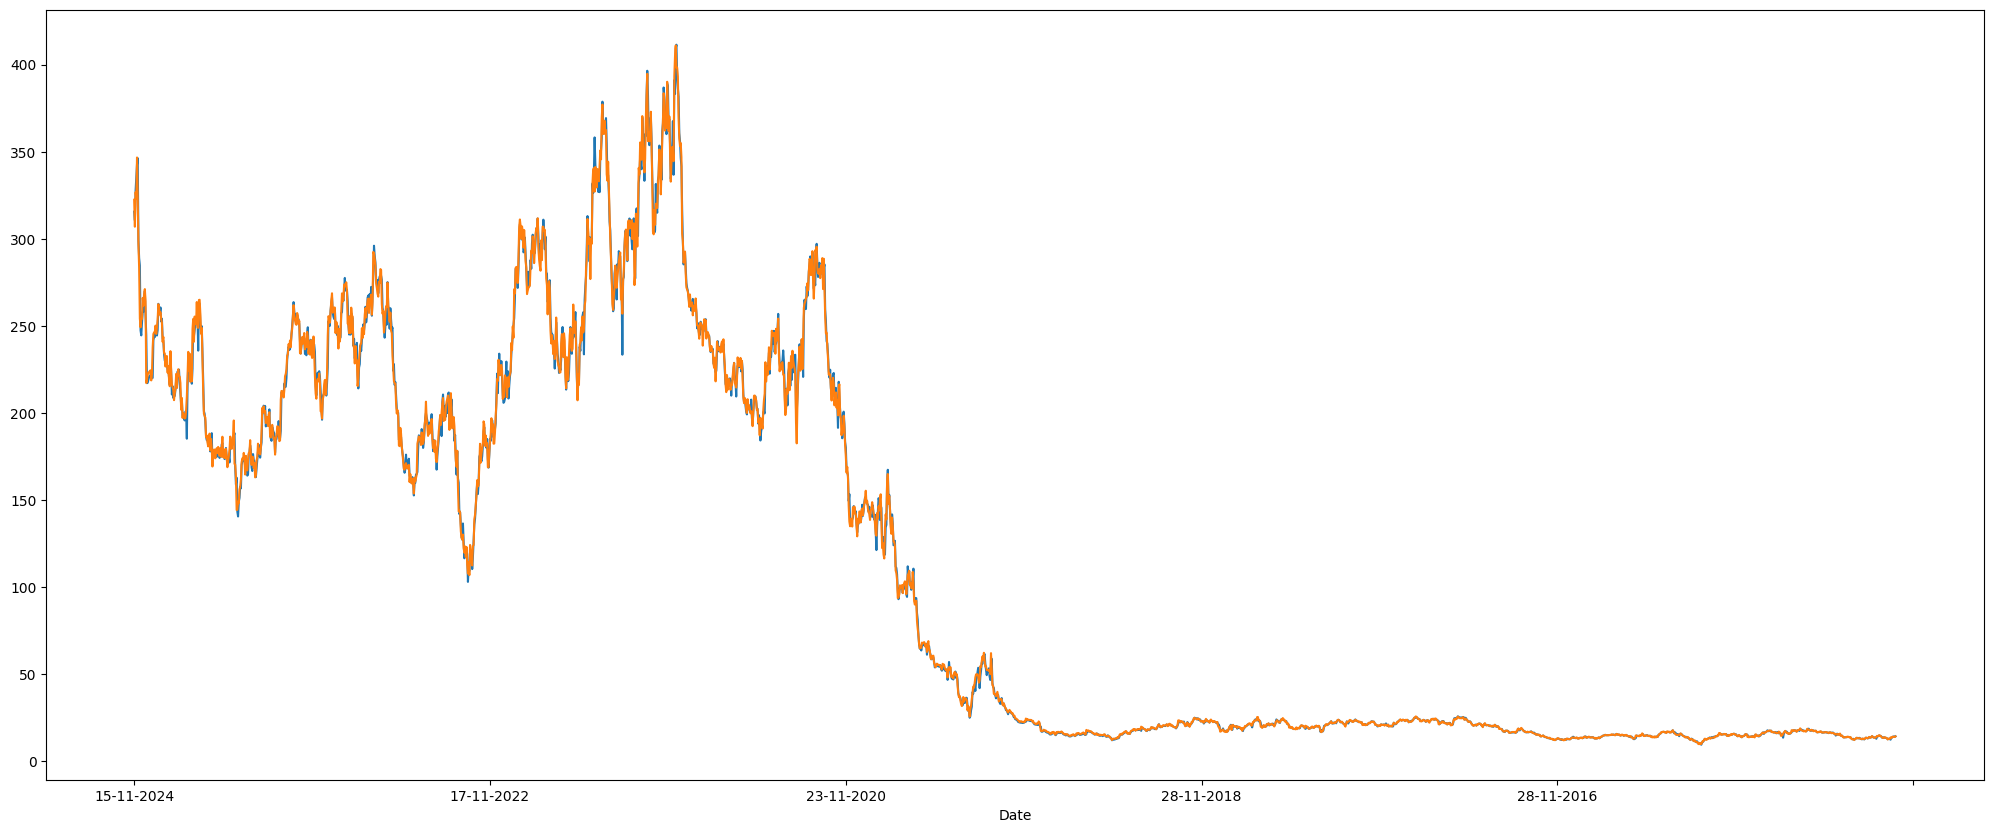

In [18]:
stock['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [19]:
predict=model_fit.predict(start=0,end=len(stock)-1,exog=sm.add_constant(stock[['Open','High','Low']]))
stock['Predicted']=predict.values
stock.tail(5)

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility,Predicted
Date,,,,,,,,,,,
08-01-2015,2481,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25,0.024408,14.134301
07-01-2015,2482,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33,0.017618,14.041266
06-01-2015,2483,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67,0.023207,13.922267
05-01-2015,2484,14.01,14.30,14.43,13.81,80.53,-0.0417,14.00,0.62,0.047857,14.000013
02-01-2015,2485,14.62,14.86,14.88,14.22,71.47,-0.0142,14.30,0.66,0.043357,14.279412
